### Tao Izzo Elvira

# CASO 1

Teniendo en cuenta la base de datos DATA_FUGA.csv que corresponde a los datos de una data que analiza la fuga de clientes de una entidad bancaria realizar las siguientes actividades:

In [1]:
import warnings
import pandas as pd
import numpy as np
from datetime import datetime
from collections import Counter
from scipy import stats
pd.set_option('display.max_columns', None)
pd.set_option("display.max_rows", None)
from sklearn.model_selection import train_test_split 
from sklearn.decomposition import FactorAnalysis
from sklearn.decomposition import PCA
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import KBinsDiscretizer
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("DATA_FUGA.csv")

In [3]:
df.head()

,CODMES,TARGET_MODEL2,EDAD,SEXO,DEPARTAMENTO,INGRESO_BRUTO_M1,FLG_CLIENTE,SEGMENTO,FLG_ADEL_SUELDO_M1,FREC_AGENTE,FLG_VEH_SF,FLG_CONV_SF,FREC_KIOSKO,FREC_BPI_TD,FREC_MON_TD,PROM_CTD_TRX_6M,ANT_CLIENTE,REC_AGENTE_TD,CTD_RECLAMOS_M1
0,201411,0,46,F,PIURA,NaN,NO CLIENTE,2,0,0,0.0,0.0,0,0,0,0.0,224.0,NaN,0
1,201411,0,54,M,LORETO,4718.0,CLIENTE,1BC,0,0,0.0,1.0,0,0,0,0.0,123.0,NaN,0
2,201411,0,81,M,NaN,NaN,CLIENTE,6,0,0,NaN,NaN,0,0,0,0.0,264.0,NaN,0
3,201411,0,42,M,PIURA,936.0,CLIENTE,2,0,0,NaN,NaN,0,0,0,0.0,263.0,NaN,0
4,201411,0,52,M,MOQUEGUA,5844.0,CLIENTE,1BC,0,0,NaN,NaN,0,0,0,0.0,263.0,NaN,0


In [4]:
df.columns

Index(['CODMES', 'TARGET_MODEL2', 'EDAD', 'SEXO', 'DEPARTAMENTO',
       'INGRESO_BRUTO_M1', 'FLG_CLIENTE', 'SEGMENTO', 'FLG_ADEL_SUELDO_M1',
       'FREC_AGENTE', 'FLG_VEH_SF', 'FLG_CONV_SF', 'FREC_KIOSKO',
       'FREC_BPI_TD', 'FREC_MON_TD', 'PROM_CTD_TRX_6M', 'ANT_CLIENTE',
       'REC_AGENTE_TD', 'CTD_RECLAMOS_M1'],
      dtype='object')

In [5]:
df.shape

(787495, 19)

In [6]:
df.dtypes

CODMES                  int64
TARGET_MODEL2           int64
EDAD                    int64
SEXO                   object
DEPARTAMENTO           object
INGRESO_BRUTO_M1      float64
FLG_CLIENTE            object
SEGMENTO               object
FLG_ADEL_SUELDO_M1      int64
FREC_AGENTE             int64
FLG_VEH_SF            float64
FLG_CONV_SF           float64
FREC_KIOSKO             int64
FREC_BPI_TD             int64
FREC_MON_TD             int64
PROM_CTD_TRX_6M       float64
ANT_CLIENTE           float64
REC_AGENTE_TD         float64
CTD_RECLAMOS_M1         int64
dtype: object

In [7]:
df.nunique()

CODMES                    3
TARGET_MODEL2             2
EDAD                    109
SEXO                      2
DEPARTAMENTO             25
INGRESO_BRUTO_M1      15162
FLG_CLIENTE               2
SEGMENTO                  8
FLG_ADEL_SUELDO_M1        2
FREC_AGENTE               7
FLG_VEH_SF                2
FLG_CONV_SF               2
FREC_KIOSKO               7
FREC_BPI_TD               7
FREC_MON_TD               7
PROM_CTD_TRX_6M         446
ANT_CLIENTE             378
REC_AGENTE_TD             6
CTD_RECLAMOS_M1           2
dtype: int64

1. Luego de haber realizado la cargar de datos y antes de realizar el particionamiento de los datos (función: train_test_split). Seleccione todas las variables que tienen más de 30% de nulos. Pregunta de selección múltiple.

In [8]:
for col in df.columns:
    print("-"*20 + col+"-"*20)
    print(f"La columna tiene {df[col].isnull().sum()} nulos")
    display(str(df[col].isnull().sum()/len(df[col])*100)+"%")

--------------------CODMES--------------------
La columna tiene 0 nulos


'0.0%'

--------------------TARGET_MODEL2--------------------
La columna tiene 0 nulos


'0.0%'

--------------------EDAD--------------------
La columna tiene 0 nulos


'0.0%'

--------------------SEXO--------------------
La columna tiene 0 nulos


'0.0%'

--------------------DEPARTAMENTO--------------------
La columna tiene 26975 nulos


'3.4254185740861844%'

--------------------INGRESO_BRUTO_M1--------------------
La columna tiene 187254 nulos


'23.778436688486913%'

--------------------FLG_CLIENTE--------------------
La columna tiene 0 nulos


'0.0%'

--------------------SEGMENTO--------------------
La columna tiene 0 nulos


'0.0%'

--------------------FLG_ADEL_SUELDO_M1--------------------
La columna tiene 0 nulos


'0.0%'

--------------------FREC_AGENTE--------------------
La columna tiene 0 nulos


'0.0%'

--------------------FLG_VEH_SF--------------------
La columna tiene 269383 nulos


'34.20758227036362%'

--------------------FLG_CONV_SF--------------------
La columna tiene 269383 nulos


'34.20758227036362%'

--------------------FREC_KIOSKO--------------------
La columna tiene 0 nulos


'0.0%'

--------------------FREC_BPI_TD--------------------
La columna tiene 0 nulos


'0.0%'

--------------------FREC_MON_TD--------------------
La columna tiene 0 nulos


'0.0%'

--------------------PROM_CTD_TRX_6M--------------------
La columna tiene 0 nulos


'0.0%'

--------------------ANT_CLIENTE--------------------
La columna tiene 923 nulos


'0.11720709337837065%'

--------------------REC_AGENTE_TD--------------------
La columna tiene 695206 nulos


'88.28068749642854%'

--------------------CTD_RECLAMOS_M1--------------------
La columna tiene 0 nulos


'0.0%'

Las columnas
- FLG_VEH_SF
- FLG_CONV_SF
- REC_AGENTE_TD

Tienen presentes mas del 30% de datos nulos

2. Elimine la variable "REC_AGENTE_TD". Realice el particionamiento de los datos usando train_test_split()  con los siguientes parametros test_size=0.7, random_state=20, stratify=y. Luego de ello aplica la imputación simple (mean y mode) a toda su data train, segun el tipo de variable. Ahora, utilizando sus datos de entrenamiento imputados seleccione la grafica de dispersion correcta, siendo x=ANT_CLIENTE y y=INGRESO_BRUTO_M1

In [9]:
df.drop(columns=["REC_AGENTE_TD"],inplace=True)

In [10]:
x = df.loc[:,['CODMES', 'EDAD', 'SEXO', 'DEPARTAMENTO',
       'INGRESO_BRUTO_M1', 'FLG_CLIENTE', 'SEGMENTO', 'FLG_ADEL_SUELDO_M1',
       'FREC_AGENTE', 'FLG_VEH_SF', 'FLG_CONV_SF', 'FREC_KIOSKO',
       'FREC_BPI_TD', 'FREC_MON_TD', 'PROM_CTD_TRX_6M', 'ANT_CLIENTE',
       'CTD_RECLAMOS_M1']]
y = df.loc[:,["TARGET_MODEL2"]]

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.7, random_state=20, stratify=y)


In [12]:
y_train.head() 

,TARGET_MODEL2
577649,0
684347,0
555294,0
369724,1
80727,0


In [13]:
categorical = x_train.select_dtypes(include=['object']).columns
numerical = x_train.select_dtypes(exclude=['object']).columns

In [14]:
categorical

Index(['SEXO', 'DEPARTAMENTO', 'FLG_CLIENTE', 'SEGMENTO'], dtype='object')

In [15]:
numerical

Index(['CODMES', 'EDAD', 'INGRESO_BRUTO_M1', 'FLG_ADEL_SUELDO_M1',
       'FREC_AGENTE', 'FLG_VEH_SF', 'FLG_CONV_SF', 'FREC_KIOSKO',
       'FREC_BPI_TD', 'FREC_MON_TD', 'PROM_CTD_TRX_6M', 'ANT_CLIENTE',
       'CTD_RECLAMOS_M1'],
      dtype='object')

In [16]:
for i in numerical:
    x_train[i] = x_train[i].fillna(df[i].mean())

In [17]:
for i in categorical:
    x_train[i] = x_train[i].fillna(df[i].mode())

Text(0.5, 1.0, 'Ingreso bruto de clinetes')

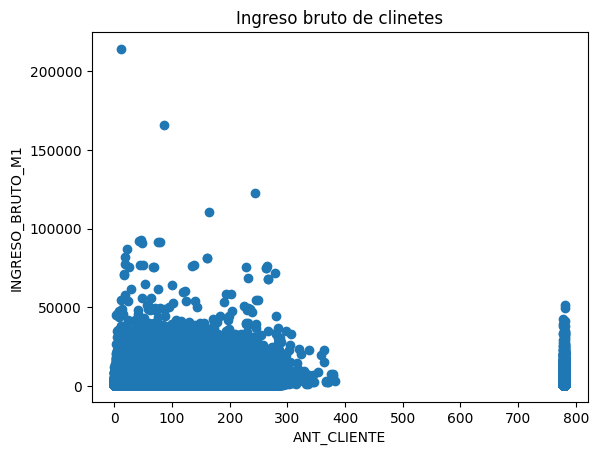

In [18]:
import matplotlib.pyplot as plt
plt.scatter(x_train.ANT_CLIENTE,x_train.INGRESO_BRUTO_M1)
plt.ylabel("INGRESO_BRUTO_M1")
plt.xlabel("ANT_CLIENTE")
plt.title("Ingreso bruto de clinetes")

3. De aplicar z_score < 3 a los datos numericos ¿Cuántas filas quedarian en el dataframe train? Nota: No sobreescriba el df de train

In [19]:
zscore = np.abs(stats.zscore(x_train[numerical]))

In [20]:
x_train_zscore=x_train[(zscore<3).all(axis=1)]

In [21]:
x_train_zscore.head()

,CODMES,EDAD,SEXO,DEPARTAMENTO,INGRESO_BRUTO_M1,FLG_CLIENTE,SEGMENTO,FLG_ADEL_SUELDO_M1,FREC_AGENTE,FLG_VEH_SF,FLG_CONV_SF,FREC_KIOSKO,FREC_BPI_TD,FREC_MON_TD,PROM_CTD_TRX_6M,ANT_CLIENTE,CTD_RECLAMOS_M1
577649,201502,50,M,PASCO,858.000000,CLIENTE,2,0,0,0.026506,0.061359,0,0,0,0.000000,153.0,0
555294,201411,24,M,LIMA,1873.000000,CLIENTE,5,0,0,0.026506,0.061359,0,0,1,0.000000,27.0,0
369724,201502,44,F,LIMA,965.000000,CLIENTE,5,0,0,0.000000,0.000000,1,0,0,1.166667,38.0,0
80727,201503,34,F,LIMA,2565.256405,NO CLIENTE,6,0,0,0.000000,0.000000,0,0,0,0.000000,80.0,0
700696,201503,24,M,LIMA,902.000000,CLIENTE,5,0,2,0.026506,0.061359,0,0,1,0.000000,51.0,0


In [22]:
len(x_train_zscore)

164791

In [23]:
len(x_train)

236248

In [24]:
len(x_train) - len(x_train_zscore)

71457

Quedarian 164,791 filas, eliminando 71,457 del data set train

4. Al realizar la discretización "uniform" a "INGRESO_BRUTO_M1" de los datos de entrenamiento. ¿Cuántos valores cayeron en el grupo 6? Nota: Considera n_bins=18

In [25]:
amplitud = KBinsDiscretizer(n_bins=18,encode="ordinal",strategy="uniform")

In [26]:
x_ingreso_uniform =amplitud.fit_transform(x_train[["INGRESO_BRUTO_M1"]])

<Axes: xlabel='INGRESO_BRUTO_M1_amplitud'>

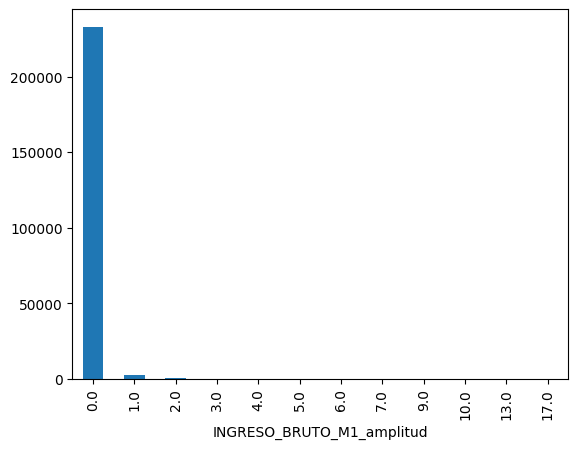

In [27]:
xs = pd.DataFrame(x_ingreso_uniform)
xs.columns = ['INGRESO_BRUTO_M1_amplitud']
xs.groupby('INGRESO_BRUTO_M1_amplitud').size().plot(kind='bar')

In [28]:
xs.value_counts()

INGRESO_BRUTO_M1_amplitud
0.0                          232996
1.0                            2752
2.0                             348
3.0                              82
4.0                              34
6.0                              15
5.0                              11
7.0                               6
9.0                               1
10.0                              1
13.0                              1
17.0                              1
dtype: int64

cuenta con 15 datos la 6ta particion

5. Al realizar la discretización "quantile" a la variable "EDAD" de los datos de entrenamiento considerando que se realizará por cuartiles. ¿Cuántos valores cayeron en el grupo 3? Nota: Considera n_bins=4

In [29]:
estq = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='quantile')

In [30]:
nuevoq = estq.fit_transform(x_train[['EDAD']])

C:\Users\Tao\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_discretization.py:216: FutureWarning: In version 1.3 onwards, subsample=2e5 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


In [31]:
nuevoq

array([[3.],
       [1.],
       [0.],
       ...,
       [2.],
       [0.],
       [2.]])

<Axes: xlabel='EDAD'>

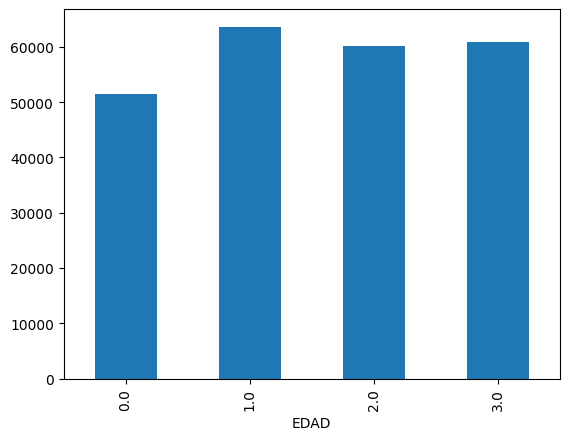

In [32]:
xq = pd.DataFrame(nuevoq)
xq.columns = ['EDAD']
xq.groupby('EDAD').size().plot(kind='bar')

In [33]:
xq.value_counts()

EDAD
1.0     63636
3.0     60893
2.0     60217
0.0     51502
dtype: int64

En el grupo 3 hay 60,893 valores

6. ¿Cuál es la proporción de los targets en el data train despues de undersampling? Considere parametros de random_state=20 y sampling_strategy=0.8

In [34]:
us = RandomUnderSampler(random_state=20,sampling_strategy=0.8)

In [35]:
x_under_s, y_under_s = us.fit_resample(x_train, y_train)

In [36]:
y_under_s.value_counts()

TARGET_MODEL2
0                16405
1                13124
dtype: int64

7. ¿Cuál seria la proporcion del target despues de aplicar un RandomOversampling? Considere parametros de random_state=20 y sampling_strategy=0.8

In [37]:
over = RandomOverSampler(random_state=20,sampling_strategy=0.8)

In [38]:
x_over_s, y_over_s = over.fit_resample(x_train, y_train)

In [39]:
y_over_s.value_counts()

TARGET_MODEL2
0                223124
1                178499
dtype: int64

# CASO 2
La presente aplicación captura datos socioeconómicos a nivel distrital para la realización de un ejemplo de reducción de dimensiones haciendo uso del análisis de componentes principales y factorial.

*NOTA*
1. Las variables a reducir son: porcentaje de hogares sin medios de comunicación (porc_hogares_sin_medios), porcentaje de alfabetismo (alfabetismo), porcentaje de hogares con 2 o más necesidades básicas incubiertas (porc_2_nbi), índice de desarrollo humano (IDH) y el coeficiente de desigualdad de GINI (GINI). Así, para la aplicación se deberá considerar estar 5 variables.

2. Antes para resolución de las preguntas deberá verificar la existencia de valores faltantes en las variables a considerar en la aplicación y en caso de requerir imputarlas deberá aplicarse imputación por la media.

In [40]:
df2 = pd.read_spss("AusentismoPres2011.sav")

In [41]:
df2.head()

,ubigeo,departamento,dom_Geo,provincia,distrito,total_electoral,total_ausentismo,porc_Ausentismo,ord_Ausentismo,dic_Ausentismo,porc_hogares_sin_medios,IDH,alfabetismo,partidoGanador,porc_2_NBI,GINI
0,010102,Amazonas,Norte,Chachapoyas,Asunción,234.0,59.0,25.213675,Ausentismo Grave,Ausentismo Fuerte,100.00,0.581463,86.893200,PERU POSIBLE,51.11,0.30
1,010103,Amazonas,Norte,Chachapoyas,Balsas,848.0,208.0,24.528301,Ausentismo Grave,Ausentismo Fuerte,94.87,0.562141,86.527290,FUERZA 2011,20.23,0.31
2,010104,Amazonas,Norte,Chachapoyas,Cheto,478.0,51.0,10.669457,Ausentismo Bajo,Ausentismo Leve,99.40,0.599150,92.838196,GANA PERU,16.87,0.28
3,010105,Amazonas,Norte,Chachapoyas,Chiliquín,638.0,197.0,30.877743,Ausentismo Grave,Ausentismo Fuerte,99.60,0.545484,86.541740,FUERZA 2011,31.73,0.29
4,010106,Amazonas,Norte,Chachapoyas,Chuquibamba,1161.0,333.0,28.682170,Ausentismo Grave,Ausentismo Fuerte,99.62,0.584659,92.598430,FUERZA 2011,17.55,0.31


In [42]:
df2.columns

Index(['ubigeo', 'departamento', 'dom_Geo', 'provincia', 'distrito',
       'total_electoral', 'total_ausentismo', 'porc_Ausentismo',
       'ord_Ausentismo', 'dic_Ausentismo', 'porc_hogares_sin_medios', 'IDH',
       'alfabetismo', 'partidoGanador', 'porc_2_NBI', 'GINI'],
      dtype='object')

In [43]:
df2.shape

(1833, 16)

In [44]:
df2.dtypes

ubigeo                       object
departamento                 object
dom_Geo                      object
provincia                    object
distrito                     object
total_electoral             float64
total_ausentismo            float64
porc_Ausentismo             float64
ord_Ausentismo             category
dic_Ausentismo             category
porc_hogares_sin_medios     float64
IDH                         float64
alfabetismo                 float64
partidoGanador               object
porc_2_NBI                  float64
GINI                        float64
dtype: object

In [45]:
df2.nunique()

ubigeo                     1832
departamento                 25
dom_Geo                       5
provincia                   195
distrito                   1683
total_electoral            1652
total_ausentismo           1149
porc_Ausentismo            1822
ord_Ausentismo                4
dic_Ausentismo                2
porc_hogares_sin_medios    1216
IDH                        1832
alfabetismo                1823
partidoGanador                5
porc_2_NBI                 1482
GINI                         26
dtype: int64

In [46]:
variables = ["porc_hogares_sin_medios","alfabetismo","porc_2_NBI","IDH","GINI"]

In [47]:
dataAusentismo = df2[variables]

In [48]:
dataAusentismo.head()

,porc_hogares_sin_medios,alfabetismo,porc_2_NBI,IDH,GINI
0,100.00,86.893200,51.11,0.581463,0.30
1,94.87,86.527290,20.23,0.562141,0.31
2,99.40,92.838196,16.87,0.599150,0.28
3,99.60,86.541740,31.73,0.545484,0.29
4,99.62,92.598430,17.55,0.584659,0.31


In [49]:
for col in dataAusentismo.columns:
    print("-"*20 + col+"-"*20)
    print(f"La columna tiene {dataAusentismo[col].isnull().sum()} nulos")
    display(str(dataAusentismo[col].isnull().sum()/len(dataAusentismo[col])*100)+"%")

--------------------porc_hogares_sin_medios--------------------
La columna tiene 1 nulos


'0.05455537370430987%'

--------------------alfabetismo--------------------
La columna tiene 0 nulos


'0.0%'

--------------------porc_2_NBI--------------------
La columna tiene 1 nulos


'0.05455537370430987%'

--------------------IDH--------------------
La columna tiene 0 nulos


'0.0%'

--------------------GINI--------------------
La columna tiene 1 nulos


'0.05455537370430987%'

In [50]:
for i in variables:
    dataAusentismo[i] = dataAusentismo[i].fillna(dataAusentismo[i].mean())

C:\Users\Tao\AppData\Local\Temp\ipykernel_77584\2918032360.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataAusentismo[i] = dataAusentismo[i].fillna(dataAusentismo[i].mean())


In [51]:
dataAusentismo.isnull().sum()

porc_hogares_sin_medios    0
alfabetismo                0
porc_2_NBI                 0
IDH                        0
GINI                       0
dtype: int64

8. Escale los datos utilizando StandarScaler()  ¿Cuáles son los dos valores más altos al obtener los Eigevalores? Nota: eigevalor optimo cercano o superior a 1

In [52]:
std = StandardScaler()

In [53]:
dataAusentismo_std =std.fit_transform(dataAusentismo)

In [54]:
dataAusentismo_std

array([[ 0.79370883,  0.05780913,  2.37840646,  0.15051446,  0.31894249],
       [ 0.58585678,  0.01676029,  0.07901366, -0.27331899,  0.58192864],
       [ 0.76939865,  0.72473601, -0.17117934,  0.53850679, -0.20702982],
       ...,
       [ 0.48456436,  0.52150548,  1.71048051,  0.34715541,  0.31894249],
       [ 0.75319186,  0.81882875,  0.99936648,  0.40895037, -0.47001598],
       [ 0.40353043, -0.64028933,  0.53770083, -0.90641868,  1.63387326]])

In [55]:
cov_mat = np.cov(dataAusentismo_std.T)

In [56]:
cov_mat

array([[ 1.00054585, -0.55557249,  0.42410777, -0.78271672, -0.18390248],
       [-0.55557249,  1.00054585, -0.22748875,  0.84662243,  0.05942182],
       [ 0.42410777, -0.22748875,  1.00054585, -0.39618228, -0.0909943 ],
       [-0.78271672,  0.84662243, -0.39618228,  1.00054585,  0.1092847 ],
       [-0.18390248,  0.05942182, -0.0909943 ,  0.1092847 ,  1.00054585]])

In [57]:
autovalores, autovectores = np.linalg.eig(cov_mat)

In [58]:
autovalores

array([2.71177068, 0.08714594, 0.38944287, 0.9937545 , 0.82061526])

In [59]:
autovectores

array([[-0.52680955,  0.34132636,  0.77634747, -0.04851744,  0.02997802],
       [ 0.50664476, -0.50914469,  0.5385197 , -0.23632166,  0.37179481],
       [-0.33866742,  0.0577763 , -0.29846317, -0.14971205,  0.87776553],
       [ 0.57828017,  0.78787823,  0.03133858, -0.13678052,  0.15858413],
       [ 0.12914803,  0.01333408,  0.13122032,  0.94903926,  0.25543824]])

In [60]:
autovalores.sort()
autovalores

array([0.08714594, 0.38944287, 0.82061526, 0.9937545 , 2.71177068])

9. ¿Cuál es el primer registro de la 1ra columna despues de aplicar PCA con el número de componentes obtenidos?Considere random_state=20 y que debemos trabajar con los datos escalados por estandarización.

In [61]:
pca = PCA(n_components=2, random_state=20)

In [62]:
pca.fit(dataAusentismo_std)

PCA(n_components=2, random_state=20)

In [63]:
rounded = [round(x,2) for x in pca.explained_variance_ratio_]
rounded

[0.54, 0.2]

In [64]:
pca.explained_variance_ratio_


array([0.54205825, 0.19864247])

In [65]:
X_pca = pca.transform(dataAusentismo_std)


In [66]:
X_pca.shape

(1833, 2)

In [67]:
df_pca = pd.DataFrame(X_pca)

In [68]:
df_pca.head()

,0,1
0,-1.066103,-0.126145
1,-0.409803,0.545443
2,0.304500,-0.453109
3,-1.079169,-0.041630
4,0.187100,0.337466


10. ¿Cuál es el primer registro de la 1ra columna despues de aplicar Analisis Factorial con el número de factores optimos? Considere random_state=20 y que debemos trabajar con los datos escalados por estandarización

In [69]:
factor = FactorAnalysis(n_components=2, random_state=20)

In [70]:
x_fa = factor.fit_transform(dataAusentismo_std)

In [71]:
x_fa_df = pd.DataFrame(x_fa, columns=["FA1","FA2"])

In [72]:
x_fa_df.head()

,FA1,FA2
0,-0.016636,-0.837262
1,-0.241867,-0.460126
2,0.455314,-1.021418
3,-0.519443,-0.861650
4,0.241034,-1.070645
